# Hands On - Predicting Credit Default - Classification RECAP SESSION

# Import & Prepare Data

In [52]:
import pandas as pd
wine = pd.read_csv("https://raw.githubusercontent.com/casbdai/datasets/main/wine_regression.csv")



*   Investigate the structure of the data.
*   Delete missing or unnecessary values if required
*   Separate features from label (price) in X and y


In [53]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vintage           38 non-null     int64  
 1   price             38 non-null     int64  
 2   winter.rain       38 non-null     float64
 3   harvest.rain      38 non-null     float64
 4   grow.temp         38 non-null     float64
 5   harvest.temp      38 non-null     float64
 6   purchasing.power  38 non-null     float64
 7   age               38 non-null     int64  
dtypes: float64(5), int64(3)
memory usage: 2.5 KB


In [54]:
wine.head()

,vintage,price,winter.rain,harvest.rain,grow.temp,harvest.temp,purchasing.power,age
0,1952,57,583.0,226.0,17.7,14.3,7785.5,69
1,1953,80,690.0,133.0,16.6,17.3,8022.8,68
2,1954,8,418.0,125.0,15.1,16.8,8328.1,67
3,1955,65,621.0,96.0,17.2,16.8,8683.1,66
4,1956,18,445.0,73.0,15.3,17.3,9129.6,65


Vintage and age carry the same information. Age is only a mathematical transformation of the vintage year.

Taking 2021 as "reference year": 2021 - 1952 = 69

Thus, we delete the variable "vintage":

In [55]:
wine = wine.drop("vintage", axis = 1)
wine.head()

,price,winter.rain,harvest.rain,grow.temp,harvest.temp,purchasing.power,age
0,57,583.0,226.0,17.7,14.3,7785.5,69
1,80,690.0,133.0,16.6,17.3,8022.8,68
2,8,418.0,125.0,15.1,16.8,8328.1,67
3,65,621.0,96.0,17.2,16.8,8683.1,66
4,18,445.0,73.0,15.3,17.3,9129.6,65


Separate Features and Target

In [56]:
X = wine.drop("price", axis = 1)
y = wine["price"]

# Train and a Decision Tree


## 1) Import Model Function

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

## 2) Instantiate Model

In [58]:
tree = DecisionTreeRegressor(random_state=1)

## 3) Create Test & Training Data


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, shuffle=False, random_state=1)

## 4) Fit Model to Training Data


In [60]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

## 5) Make Predictions on Testing Data


In [61]:
y_pred = tree.predict(X_test)

## 6) Evaluate Performance



*   Print RMSE and MAE as error measures

---





In [62]:
root_mean_squared_error(y_test, y_pred)

12.465953633797938

In [63]:
mean_absolute_percentage_error(y_test, y_pred)

0.3968482905982906

Is it good model? Why? Why Not?

**Answer:**____

## 7) Plot Tree

In [64]:
def plot_tree_regression(treemodel, X_train):
    from sklearn import tree
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(60,20))
    _ = tree.plot_tree(treemodel, feature_names=X_train.columns, filled=True, precision=2)

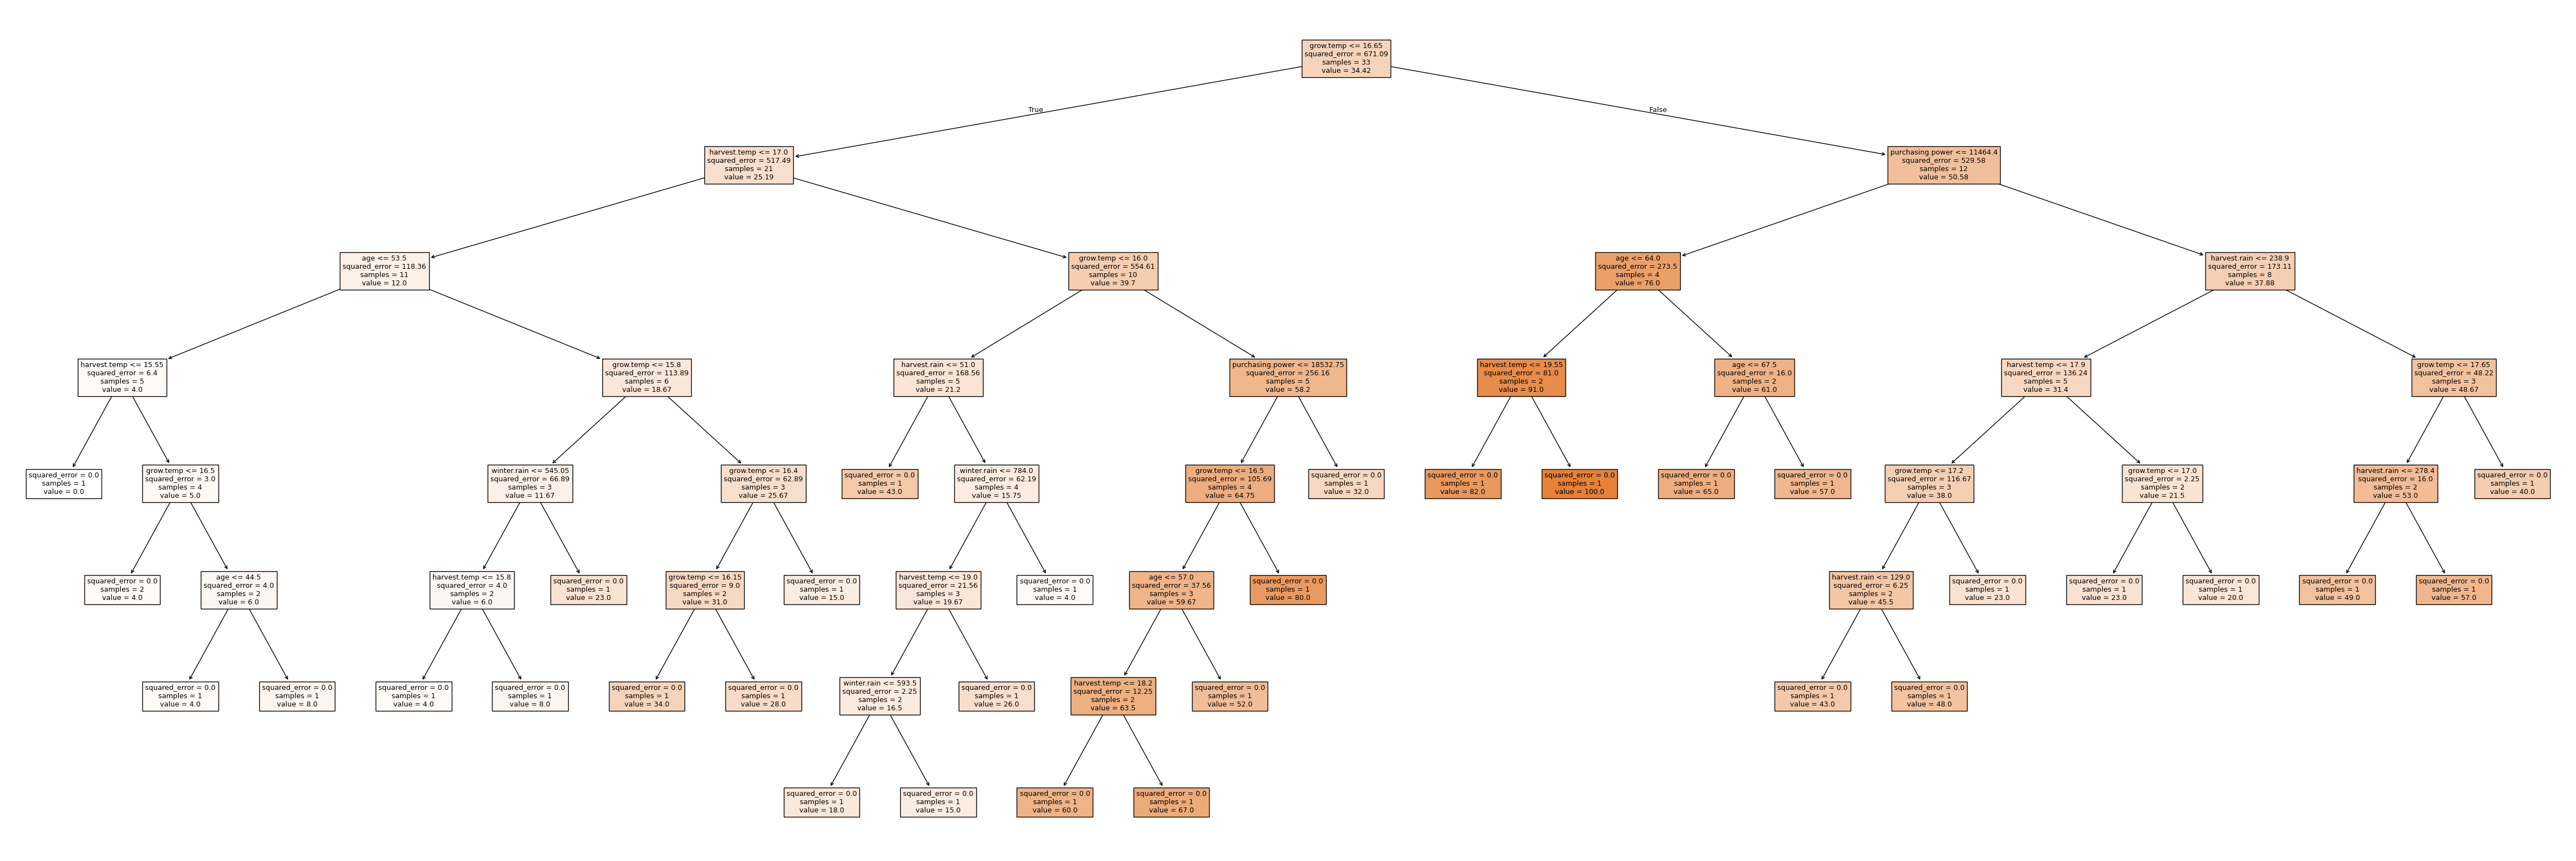

In [65]:
plot_tree_regression(tree, X_train)

# Build a better model - Apply a Random Forest

## 1) Import Model Function

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 2) Instantiate Model

Build a random forest with 500 Trees

In [67]:
forest = RandomForestRegressor(n_estimators=500, random_state=1)

## 3) Create Test & Training Data

To compare the performance between models, make sure to use the identical split (same parameters like test_size and random_state). Instead of creating a new split, you could also just use the train/test data from above.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, shuffle=False, random_state=1)

## 3) Fit Model to Training Data (Using the Same Split as Above)

In [69]:
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=1)

## 5) Make Predictions on Testing Data

In [70]:
y_pred = forest.predict(X_test)

## 6) Evaluate Performance

*   Print RMSE and MAE as error measures


In [71]:
root_mean_squared_error(y_test, y_pred)

9.40134015978573

In [72]:
mean_absolute_percentage_error(y_test, y_pred)

0.3693336166852471

Compare the RandomForest to the DecisionTree? Which model is better?

**Answer:** ____